In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.callbacks import EarlyStopping

In [4]:
base_dir='.'
data_dir = os.path.join(base_dir, 'train')
files = os.listdir(data_dir)

In [5]:
labels = pd.read_csv(os.path.join(base_dir, 'labels.csv'))
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
file_df = pd.DataFrame({'id':list(map(lambda x:x.replace('.jpg', ''), files))})
file_df.head()

,id
0,000bec180eb18c7604dcecc8fe0dba07
1,001513dfcb2ffafc82cccf4d8bbaba97
2,001cdf01b096e06d78e9e5112d419397
3,00214f311d5d2247d5dfe4fe24b2303d
4,0021f9ceb3235effd7fcde7f7538ed62


In [8]:
label_info = pd.merge(left=file_df, right=labels)
label_info.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
img = plt.imread(os.path.join(data_dir, files[1]))

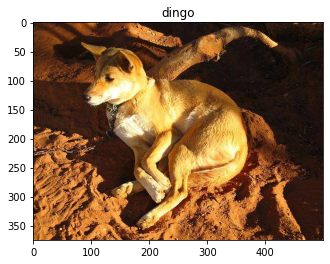

In [10]:
plt.imshow(img)
plt.title(label_info.iloc[1]['breed'])
plt.show()

In [12]:
num_classes = len(label_info.breed.unique())
num_classes

120

In [13]:
le = LabelEncoder()
breed = le.fit_transform(label_info.breed)
Y = np_utils.to_categorical(breed, num_classes=num_classes)

In [14]:
Y.shape

(10222, 120)

In [ ]:
input_dim = (224, 224)
X = np.zeros((Y.shape[0], *input_dim, 3))

for i, img in enumerate(files):
    image = load_img(os.path.join(data_dir, img), target_size=input_dim)